In [1]:
!pip install minisom pandas numpy matplotlib


  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=687493981b424ebe268bdddc437deed86fcde8b71e25eecffb3fb4ab9cc238bd
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


In [2]:
import pandas as pd

# Load Wine Quality Dataset (White wine)
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
data = pd.read_csv(url, sep=';')

# Check the first few rows of the dataset
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
from sklearn.preprocessing import MinMaxScaler

# Select input features (drop the quality column)
X = data.drop('quality', axis=1)

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Check the normalized data
pd.DataFrame(X_normalized, columns=X.columns).head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452


In [4]:
from minisom import MiniSom

# Initialize SOM: grid size (10x10), input length (11 features), sigma (spread), and learning rate
som = MiniSom(x=10, y=10, input_len=11, sigma=1.0, learning_rate=0.5)

# Randomly initialize the weights of the SOM
som.random_weights_init(X_normalized)

# Train the SOM for 100 iterations
som.train_random(X_normalized, 100)


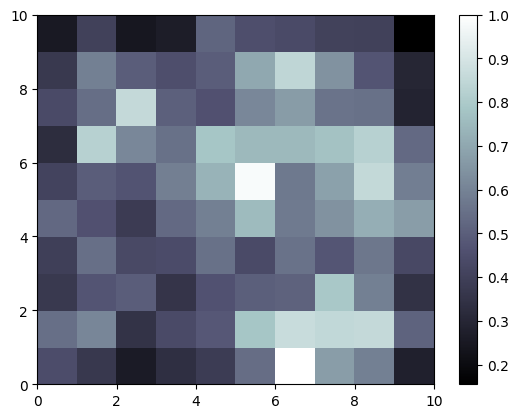

In [5]:
import matplotlib.pyplot as plt
from pylab import bone, pcolor, colorbar

# Plot the SOM distance map
bone()  # Create the SOM grid
pcolor(som.distance_map().T)  # Distance map as background
colorbar()  # Add color legend
plt.show()


<ipython-input-6-16fb4c745fb8>:15: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  plot(winner[0] + 0.5, winner[1] + 0.5, markers[data['quality'].iloc[i] > 5],
<ipython-input-6-16fb4c745fb8>:16: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  markeredgecolor=colors[data['quality'].iloc[i] > 5], markerfacecolor='None',


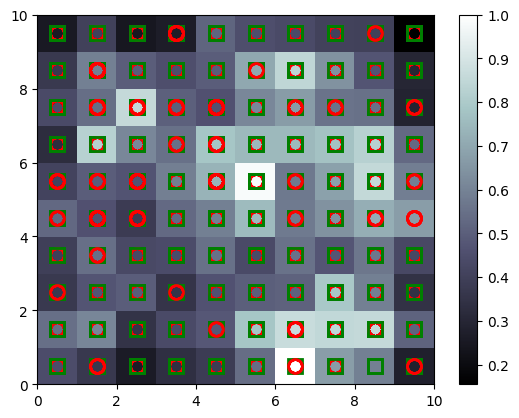

In [6]:
from pylab import plot

# Visualize the wines on the SOM grid
bone()
pcolor(som.distance_map().T)
colorbar()

# Define markers and colors
markers = ['o', 's']
colors = ['r', 'g']

# Plot each wine on the SOM grid
for i, x in enumerate(X_normalized):
    winner = som.winner(x)  # Find the winning neuron for each wine
    plot(winner[0] + 0.5, winner[1] + 0.5, markers[data['quality'].iloc[i] > 5],
         markeredgecolor=colors[data['quality'].iloc[i] > 5], markerfacecolor='None',
         markersize=10, markeredgewidth=2)

plt.show()


In [7]:
# Increase the grid size or iterations for larger datasets
som = MiniSom(x=20, y=20, input_len=11, sigma=1.0, learning_rate=0.5)
som.train_random(X_normalized, 500)


In [8]:
# Increase the grid size to 20x20
som = MiniSom(x=20, y=20, input_len=11, sigma=1.0, learning_rate=0.5)

# Train the SOM with the increased grid size
som.train_random(X_normalized, 500)


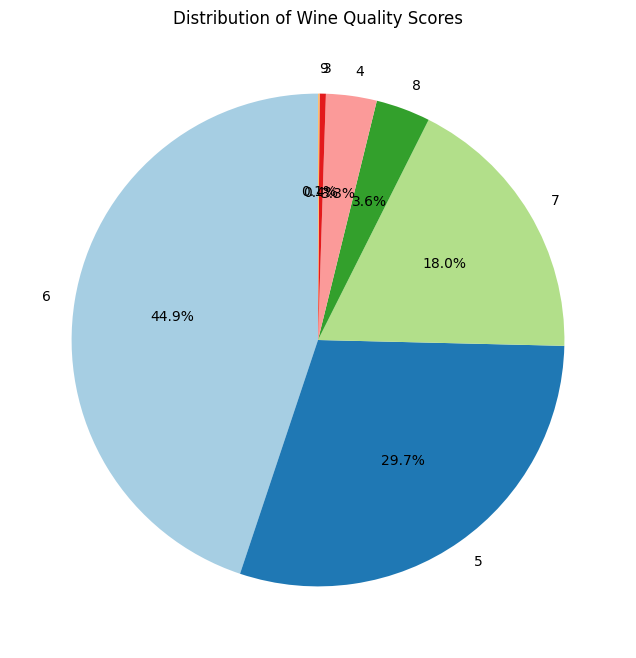

In [9]:
import matplotlib.pyplot as plt

# Count the occurrences of each wine quality score
quality_counts = data['quality'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(quality_counts, labels=quality_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Wine Quality Scores')
plt.show()


In [10]:
import matplotlib.pyplot as plt

# Count the occurrences of each wine quality score
quality_counts = data['quality'].value_counts()

# Colors for each quality score
colors = plt.cm.Paired(np.linspace(0, 1, len(quality_counts)))

# Create an improved pie chart
plt.figure(figsize=(8, 8))
plt.pie(quality_counts,
        labels=[f'Quality {q}' for q in quality_counts.index],  # Clear labels for each slice
        autopct='%1.1f%%',  # Show percentages
        startangle=90,  # Rotate pie chart
        colors=colors,  # Assign colors
        wedgeprops={'edgecolor': 'black'})  # Add border to slices

# Add a title
plt.title('Distribution of Wine Quality Scores', fontsize=14)

# Create a legend for clarity
plt.legend([f'Quality {q}' for q in quality_counts.index], title="Wine Quality", loc='best')

# Show the pie chart
plt.show()


NameError: name 'np' is not defined

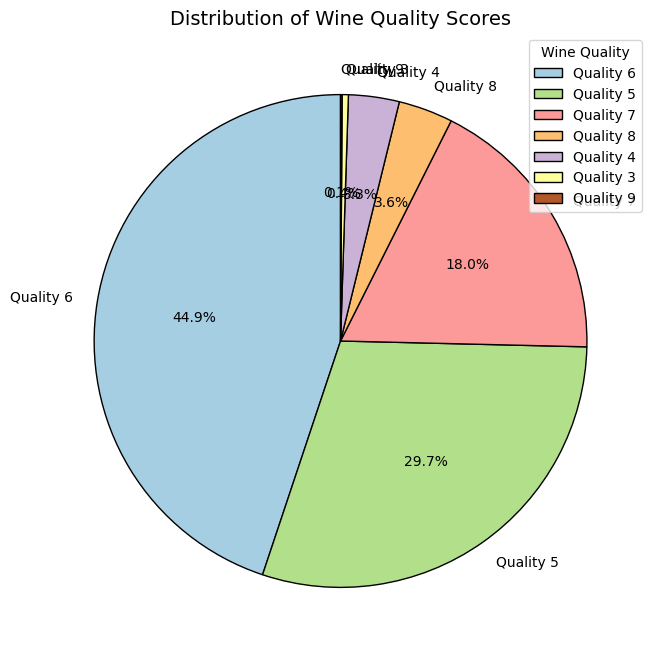

In [11]:
import matplotlib.pyplot as plt
import numpy as np  # Import NumPy

# Count the occurrences of each wine quality score
quality_counts = data['quality'].value_counts()

# Colors for each quality score
colors = plt.cm.Paired(np.linspace(0, 1, len(quality_counts)))

# Create an improved pie chart
plt.figure(figsize=(8, 8))
plt.pie(quality_counts,
        labels=[f'Quality {q}' for q in quality_counts.index],  # Clear labels for each slice
        autopct='%1.1f%%',  # Show percentages
        startangle=90,  # Rotate pie chart
        colors=colors,  # Assign colors
        wedgeprops={'edgecolor': 'black'})  # Add border to slices

# Add a title
plt.title('Distribution of Wine Quality Scores', fontsize=14)

# Create a legend for clarity
plt.legend([f'Quality {q}' for q in quality_counts.index], title="Wine Quality", loc='best')

# Show the pie chart
plt.show()


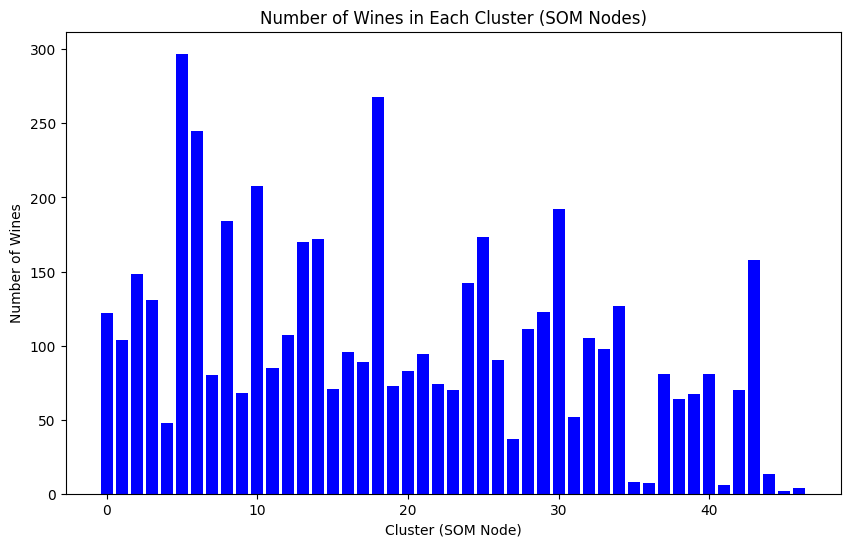

In [12]:
from collections import Counter

# Get the winning nodes (clusters) for each wine
win_map = som.win_map(X_normalized)

# Count the number of wines in each cluster (winning node)
cluster_counts = [len(win_map[win]) for win in win_map]

# Create a bar chart of the cluster sizes
plt.figure(figsize=(10, 6))
plt.bar(range(len(cluster_counts)), cluster_counts, color='blue')
plt.title('Number of Wines in Each Cluster (SOM Nodes)')
plt.xlabel('Cluster (SOM Node)')
plt.ylabel('Number of Wines')
plt.show()


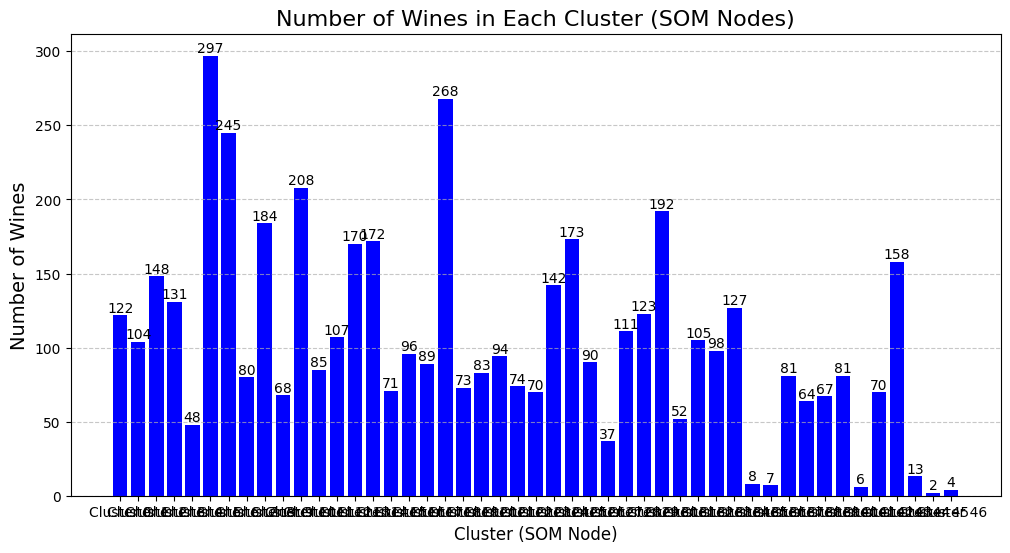

In [14]:
import matplotlib.pyplot as plt
from collections import Counter

# Get the winning nodes (clusters) for each wine
win_map = som.win_map(X_normalized)

# Count the number of wines in each cluster (winning node)
cluster_counts = [len(win_map[win]) for win in win_map]

# Create a bar chart of the cluster sizes
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(cluster_counts)), cluster_counts, color='blue')

# Add title and labels
plt.title('Number of Wines in Each Cluster (SOM Nodes)', fontsize=16)
plt.xlabel('Cluster (SOM Node)', fontsize=12)
plt.ylabel('Number of Wines', fontsize=14)

# Set X-ticks to represent cluster numbers
plt.xticks(range(len(cluster_counts)), [f'Cluster {i}' for i in range(len(cluster_counts))])

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the number of wines above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)

# Show the bar chart
plt.show()


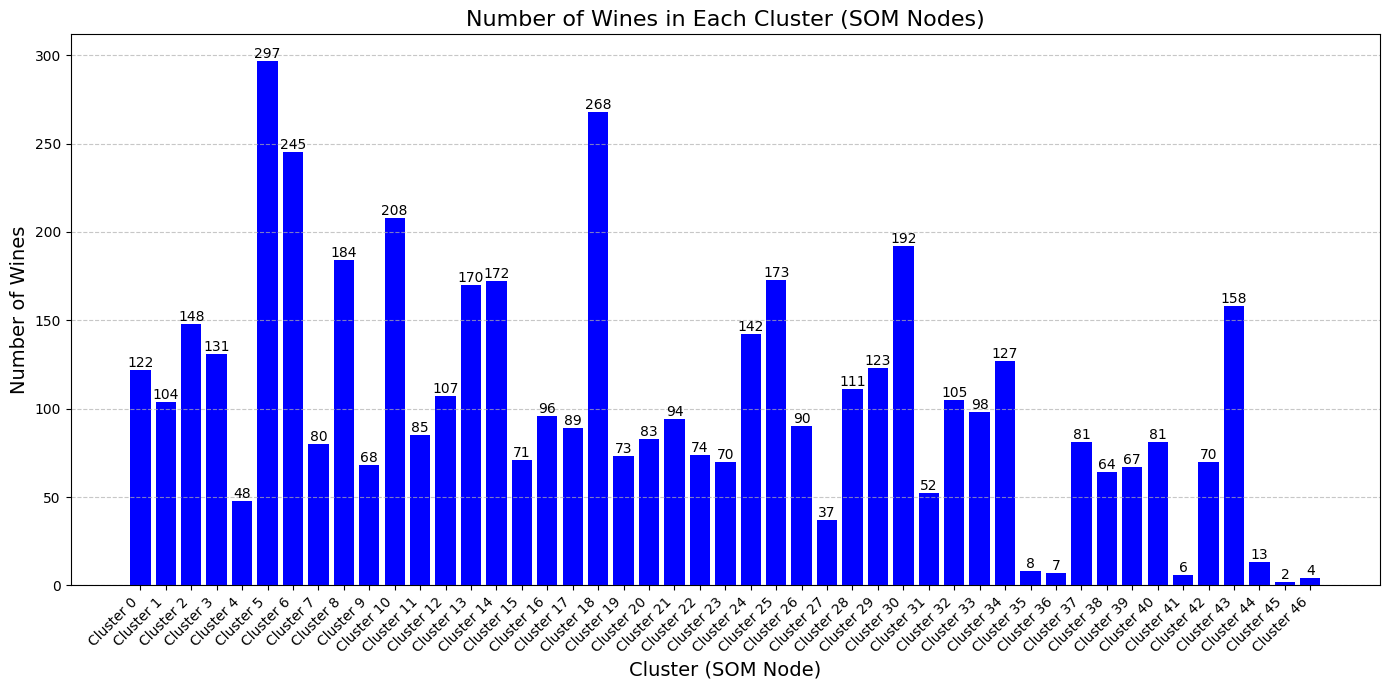

In [15]:
import matplotlib.pyplot as plt
from collections import Counter

# Get the winning nodes (clusters) for each wine
win_map = som.win_map(X_normalized)

# Count the number of wines in each cluster (winning node)
cluster_counts = [len(win_map[win]) for win in win_map]

# Create a bar chart of the cluster sizes
plt.figure(figsize=(14, 7))  # Increased figure size for better visibility
bars = plt.bar(range(len(cluster_counts)), cluster_counts, color='blue')

# Add title and labels
plt.title('Number of Wines in Each Cluster (SOM Nodes)', fontsize=16)
plt.xlabel('Cluster (SOM Node)', fontsize=14)
plt.ylabel('Number of Wines', fontsize=14)

# Set X-ticks to represent cluster numbers with rotation for clarity
plt.xticks(range(len(cluster_counts)), [f'Cluster {i}' for i in range(len(cluster_counts))], rotation=45, ha='right')

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the number of wines above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)

# Show the bar chart
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


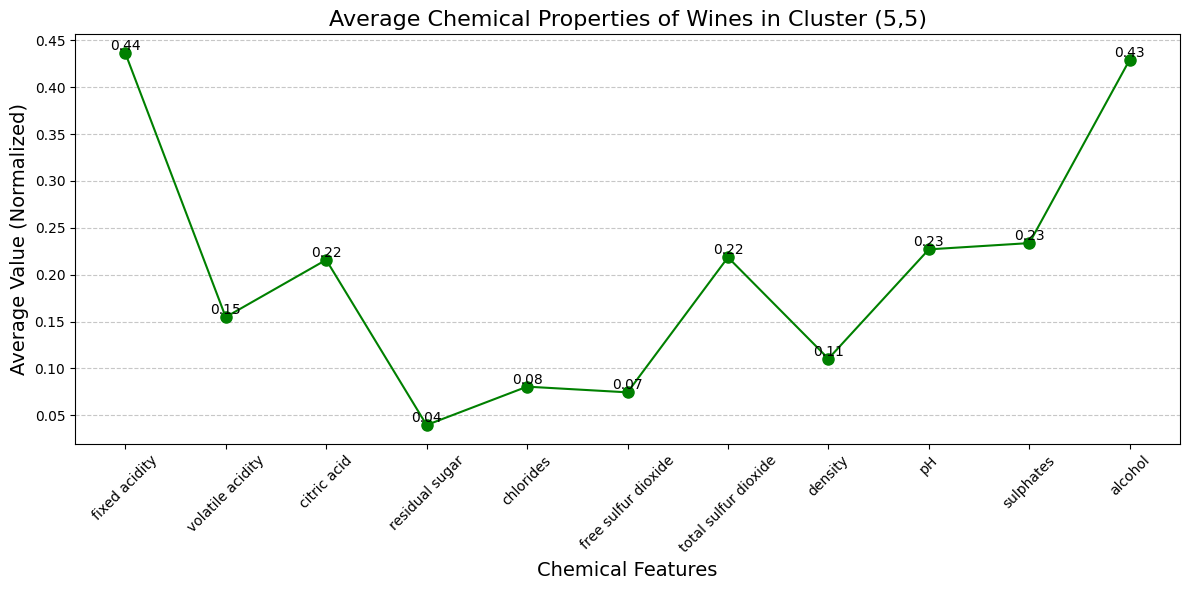

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Choose a specific SOM cluster to analyze
cluster_wines = np.array(win_map[(5, 5)])  # Example cluster (5,5) from the SOM grid

# Calculate the average chemical properties for wines in this cluster
average_properties = np.mean(cluster_wines, axis=0)

# Plot a line graph of the average properties
plt.figure(figsize=(12, 6))
plt.plot(X.columns, average_properties, marker='o', linestyle='-', color='green', markersize=8)

# Add title and labels
plt.title('Average Chemical Properties of Wines in Cluster (5,5)', fontsize=16)
plt.xlabel('Chemical Features', fontsize=14)
plt.ylabel('Average Value (Normalized)', fontsize=14)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the average values above each point
for i, value in enumerate(average_properties):
    plt.text(X.columns[i], value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Set X-ticks to show chemical feature names
plt.xticks(rotation=45)  # Rotate labels for better visibility

# Show the line chart
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()
